In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [248]:
#1.1 Loading the datasets
train_df = pd.read_csv('/content/Titanic_test.csv')

In [249]:
test_df = pd.read_csv('/content/Titanic_train.csv')

In [250]:
#1.2 Performing EDA
print(train_df.head())
print(test_df.head())

   PassengerId  Pclass                                          Name  ...     Fare  Cabin  Embarked
0          892       3                              Kelly, Mr. James  ...   7.8292    NaN         Q
1          893       3              Wilkes, Mrs. James (Ellen Needs)  ...   7.0000    NaN         S
2          894       2                     Myles, Mr. Thomas Francis  ...   9.6875    NaN         Q
3          895       3                              Wirz, Mr. Albert  ...   8.6625    NaN         S
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  ...  12.2875    NaN         S

[5 rows x 11 columns]
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

In [251]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pcl

In [252]:
train_df.describe()


PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [253]:
train_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [254]:
col=['PassengerId','Name','Ticket','Cabin']
data=train_df.drop(col,axis=1)

In [255]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [256]:
data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [257]:
mean_age=data['Age'].mean()
mean_age=np.round(mean_age,2)
mean_age
data['Age']=data['Age'].fillna(mean_age)

In [258]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [259]:
data.dropna(inplace=True)

In [260]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [261]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [262]:
new_sex=data['Sex'].map({'male':0,'female':1})
data=data.drop('Sex',axis=1)
data['Sex']=new_sex
data.head()

Pclass   Age  SibSp  Parch     Fare Embarked  Sex
0       3  34.5      0      0   7.8292        Q    0
1       3  47.0      1      0   7.0000        S    1
2       2  62.0      0      0   9.6875        Q    0
3       3  27.0      0      0   8.6625        S    0
4       3  22.0      1      1  12.2875        S    1

In [263]:
data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [264]:
new_embarked=data['Embarked'].map({'S':1,'C':2,'Q':3})
data=data.drop('Embarked',axis=1)
data['Embarked']=new_embarked
data.head()

Pclass   Age  SibSp  Parch     Fare  Sex  Embarked
0       3  34.5      0      0   7.8292    0         3
1       3  47.0      1      0   7.0000    1         1
2       2  62.0      0      0   9.6875    0         3
3       3  27.0      0      0   8.6625    0         1
4       3  22.0      1      1  12.2875    1         1

In [265]:
data.head()

Pclass   Age  SibSp  Parch     Fare  Sex  Embarked
0       3  34.5      0      0   7.8292    0         3
1       3  47.0      1      0   7.0000    1         1
2       2  62.0      0      0   9.6875    0         3
3       3  27.0      0      0   8.6625    0         1
4       3  22.0      1      1  12.2875    1         1

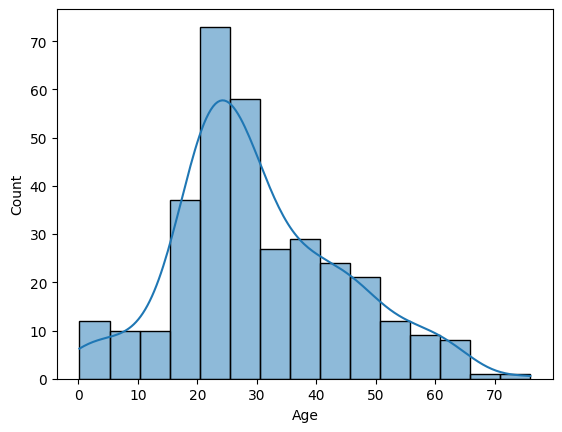

In [266]:
#1.3 Data Visualisation
#histplot for Age(train dataset)
sns.histplot(train_df['Age'], kde=True)
plt.show()

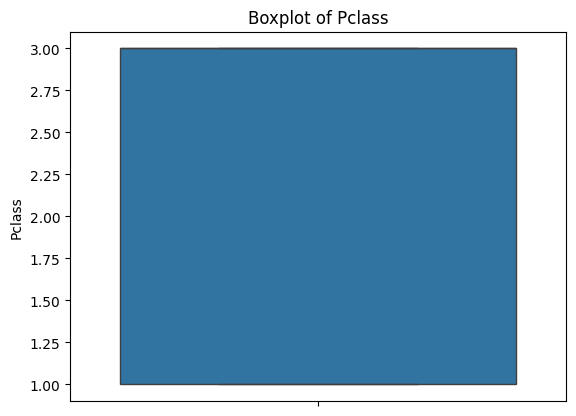

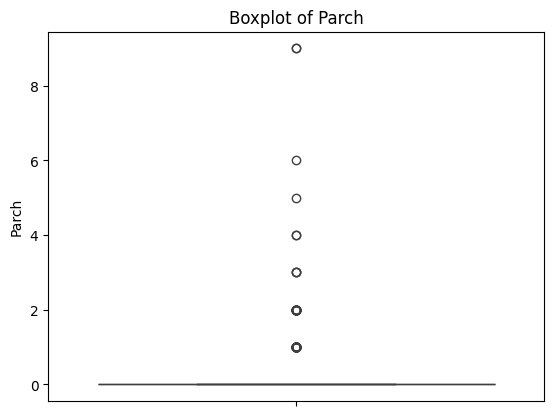

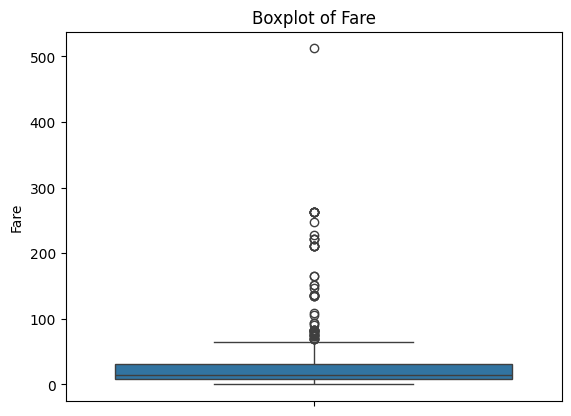

In [267]:
# Boxplot for multiple numerical features(train dataset)
numerical_features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']

for feature in numerical_features:
    sns.boxplot(y=train_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [268]:
#pairplot
sns.pairplot(train_df)
plt.show()

In [269]:
#correlation
# Select only the numeric columns before calculating correlations
numeric_df = train_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [270]:
#2.1 Handling Missing Values
# Fill missing values (example: with median for numerical columns)
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [271]:
# 2.2 One-hot encode categorical variables
data= pd.get_dummies(data, drop_first=True)

In [272]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [273]:
from sklearn.linear_model import LogisticRegression

In [274]:
m=LogisticRegression()
m.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [275]:
y_pred = m.predict(X)

In [276]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': m.predict(X)})

In [277]:
print(y_pred_df.to_string())

     actual  predicted
0         3          3
1         3          3
2         2          3
3         3          3
4         3          3
5         3          3
6         3          3
7         2          2
8         3          3
9         3          3
10        3          3
11        1          1
12        1          1
13        2          1
14        1          1
15        2          2
16        2          3
17        3          3
18        3          3
19        3          3
20        1          1
21        3          3
22        1          1
23        1          1
24        1          1
25        3          3
26        1          1
27        3          3
28        1          1
29        3          3
30        2          2
31        2          2
32        3          3
33        3          3
34        1          1
35        3          3
36        3          3
37        3          3
38        3          3
39        3          1
40        3          3
41        1          2
42        3

In [278]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,y_pred)

array([[ 94,  11,   2],
       [  8,  48,  37],
       [  2,   4, 211]])

In [279]:
data["Age"].value_counts()

Age
30.27    86
24.00    17
21.00    17
22.00    16
30.00    15
         ..
67.00     1
28.50     1
22.50     1
62.00     1
38.50     1
Name: count, Length: 79, dtype: int64

In [280]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89       107
           2       0.76      0.52      0.62        93
           3       0.84      0.97      0.90       217

    accuracy                           0.85       417
   macro avg       0.84      0.79      0.80       417
weighted avg       0.84      0.85      0.84       417



In [281]:
y_pred_df.head()

actual  predicted
0       3          3
1       3          3
2       2          3
3       3          3
4       3          3

In [282]:
m.predict_proba(X)

array([[0.02189573, 0.06244465, 0.91565962],
       [0.01010134, 0.051484  , 0.93841466],
       [0.34401909, 0.10333923, 0.55264169],
       ...,
       [0.03086282, 0.2057089 , 0.76342828],
       [0.01885491, 0.21737977, 0.76376532],
       [0.01503678, 0.1988247 , 0.78613852]])

In [283]:
# ROC Curve

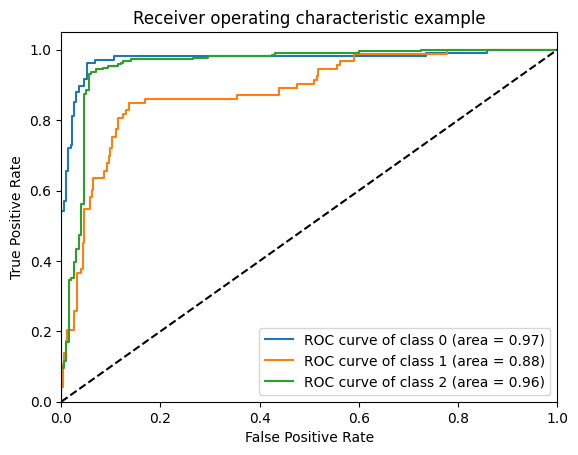

In [284]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_bin = label_binarize(Y, classes=np.unique(Y))
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict() # Initialize a dictionary to store thresholds
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_bin[:, i], m.predict_proba(X)[:, i]) # Unpack thresholds here
    roc_auc[i] = roc_auc_score(y_bin[:, i], m.predict_proba(X)[:, i])

# Plot ROC curves for each class
import matplotlib.pyplot as plt
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [285]:
# Access AUC for a specific class (replace 0 with the desired class index)
roc_auc[0]

0.9738619234247814

In [286]:
#6 Streamlit

In [287]:
!pip install streamlit

In [288]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression
import pickle
from pickle import dump

In [289]:
with open('model09.pkl', 'wb') as file:
  pickle.dump(m, file)

In [290]:
data.head()

Pclass   Age  SibSp  Parch     Fare  Sex  Embarked
0       3  34.5      0      0   7.8292    0         3
1       3  47.0      1      0   7.0000    1         1
2       2  62.0      0      0   9.6875    0         3
3       3  27.0      0      0   8.6625    0         1
4       3  22.0      1      1  12.2875    1         1